In [82]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sn

In [83]:
# Specify what kind of data to use
original = False
fixed_length = not original
noise = True
jitter = True

subset = "train"

# prepare data selection
name = ""
data_features = [original, fixed_length, noise, jitter]
data_attributes = ["original", "fix_len", "noisy", "temp_jitter"]
for num,el in enumerate(list(np.where(np.array(data_features)==True)[0])):
    name += "{} ".format(data_attributes[el])
name = name[:-1]
name = name.replace(" ","_")

idx = np.random.randint(0, 10)

In [84]:
if subset == "test":
    ds = torch.load("./{}/{}_ds_{}.pt".format(name,name,subset))
else:
    ds = torch.load("./{}/{}_ds_{}_{}.pt".format(name,name,subset,idx))

In [85]:
labels = []

for num in range(len(ds)):
    labels.append(ds[num][1].numpy().item())

In [86]:
labels_mapping = {
    'A': "Tonic spiking",
    'B': "Class 1",
    'C': "Spike frequency adaptation",
    'D': "Phasic spiking",
    'E': "Accommodation",
    'F': "Threshold variability",
    'G': "Rebound spike",
    'H': "Class 2",
    'I': "Integrator",
    'J': "Input bistability",
    'K': "Hyperpolarizing spiking",
    'L': "Hyperpolarizing bursting",
    'M': "Tonic bursting",
    'N': "Phasic bursting",
    'O': "Rebound burst",
    'P': "Mixed mode",
    'Q': "Afterpotentials",
    'R': "Basal bistability",
    'S': "Preferred frequency",
    'T': "Spike latency",
}

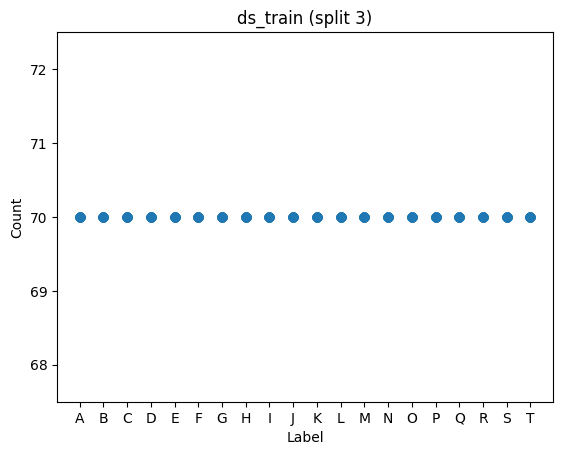

In [90]:
count = []
for num,el in enumerate(labels):
    count.append(len(np.where(np.array(labels)==el)[0]))

plt.scatter(labels,count)
if subset == "test":
    plt.title("ds_{}".format(subset))
else:
    plt.title("ds_{} (split {})".format(subset,idx))
plt.xlabel("Label")
plt.ylabel("Count")
plt.ylim((np.min(count)-2.5,np.max(count)+2.5))
plt.xticks(range(0,20),list(labels_mapping.keys()))
plt.yticks(range(np.min(count)-2,np.max(count)+3))
plt.show()